In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/Colab\ Notebooks/Current\ Work

/content/drive/MyDrive/Colab Notebooks/Current Work


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [5]:
import os
path=os.getcwd()

In [6]:
path=Path(path)
path.ls()

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/.ipynb_checkpoints'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/images'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/labels_ex'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/labels_od'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/codes.txt'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/valid.txt'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/test.txt'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/Untitled0.ipynb')]

In [7]:
path_lbl = path/'labels_ex'
path_img = path/'images'

In [8]:
path_img

PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/images')

In [9]:
path_lbl

PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/labels_ex')

In [10]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/images/IDRiD_01.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/images/IDRiD_02.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/images/IDRiD_04.jpg')]

In [11]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/labels_ex/IDRiD_13_EX.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/labels_ex/IDRiD_36_EX.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Current Work/labels_ex/IDRiD_35_EX.jpg')]

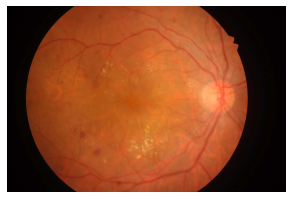

In [12]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [13]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_EX.jpg'

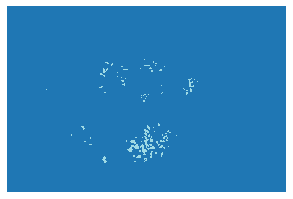

In [14]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [15]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([2848, 4288]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [16]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Exudate', 'Normal'], dtype='<U7')

In [17]:
class MySegmentationLabelList(SegmentationLabelList):
    def open(self, fn): return open_mask(fn, div=True)

class MySegmentationItemList(ImageList):
    "`ItemList` suitable for segmentation tasks."
    _label_cls,_square_show_res = MySegmentationLabelList,False

In [18]:
bs=2
size = src_size//4

In [19]:
src = (MySegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

In [20]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs,num_workers=0)
        .normalize(imagenet_stats))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

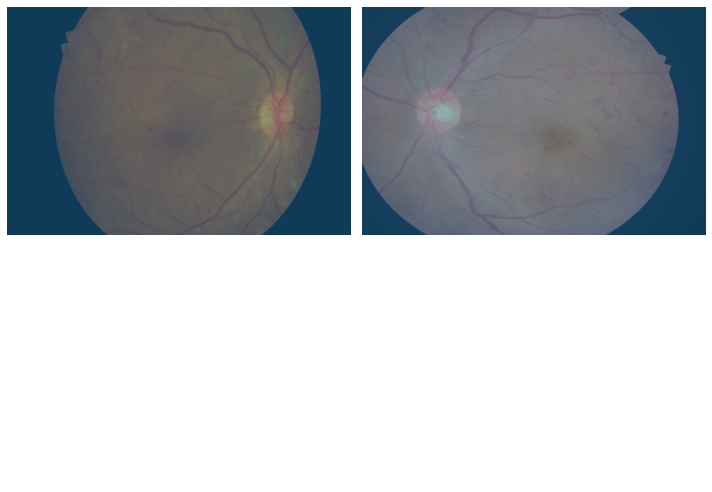

In [21]:
data.show_batch(2, figsize=(10,7))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

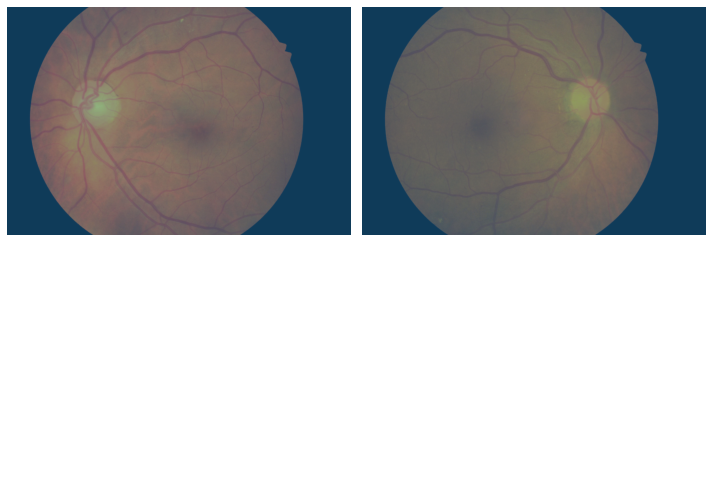

In [22]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

In [23]:
def accuracy(input, targs):
    n = targs.shape[0]
    targs = targs.squeeze(1)
    targs = targs.view(n,-1)
    input = input.argmax(dim=1).view(n,-1)
    return (input==targs).float().mean()

In [24]:
wd=1e-2

In [25]:
learn = unet_learner(data, models.resnet34, metrics=accuracy, wd=wd)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


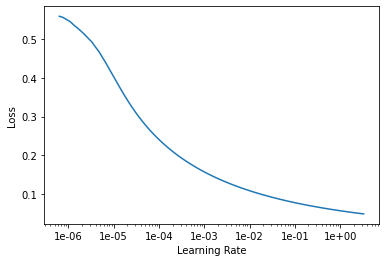

In [26]:
lr_find(learn)
learn.recorder.plot()

In [27]:
lr=1e-5

In [28]:
learn.fit_one_cycle(15, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.478176,0.381541,0.952558,01:07
1,0.359058,0.191662,0.993267,01:05
2,0.240481,0.055141,0.999199,01:04
3,0.146462,0.011952,0.999851,01:03
4,0.087819,0.004088,0.999968,01:04
5,0.053386,0.002280,0.999985,01:03
6,0.032928,0.001554,0.999993,01:05
7,0.020530,0.001077,0.999995,01:04
8,0.012895,0.000759,0.999996,01:04
9,0.008165,0.000570,0.999999,01:04


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

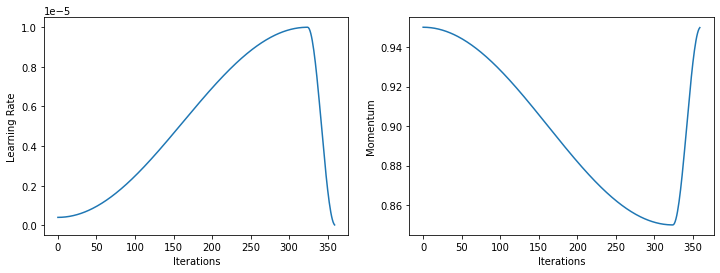

In [29]:
learn.recorder.plot_lr(show_moms=True)

In [30]:
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.000169,0.000154,1.000000,01:04
1,0.000151,0.000117,1.000000,01:03
2,0.000128,0.000097,1.000000,01:03
3,0.000112,0.000087,1.000000,01:03
4,0.000102,0.000088,1.000000,01:03


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

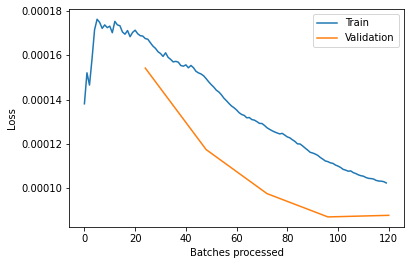

In [31]:
learn.recorder.plot_losses()

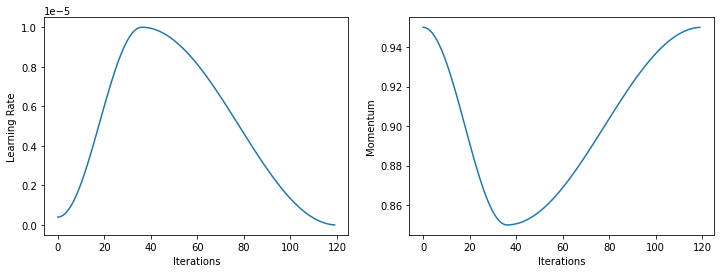

In [32]:
learn.recorder.plot_lr(show_moms=True)

In [33]:
learn.fit_one_cycle(5, lr, pct_start=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.000090,0.000085,1.000000,01:03
1,0.000087,0.000077,1.000000,01:03
2,0.000080,0.000063,1.000000,01:04
3,0.000070,0.000048,1.000000,01:04
4,0.000058,0.000038,1.000000,01:04


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

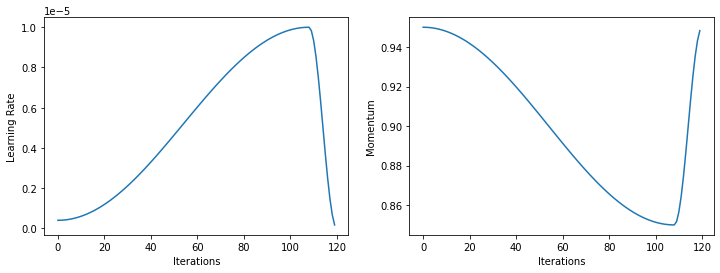

In [34]:
learn.recorder.plot_lr(show_moms=True)

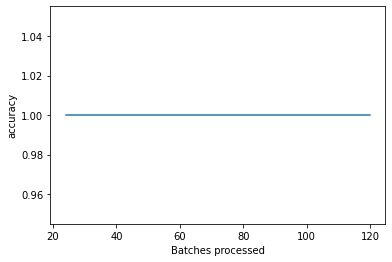

In [35]:
learn.recorder.plot_metrics()

In [36]:
learn.save('stage-1')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

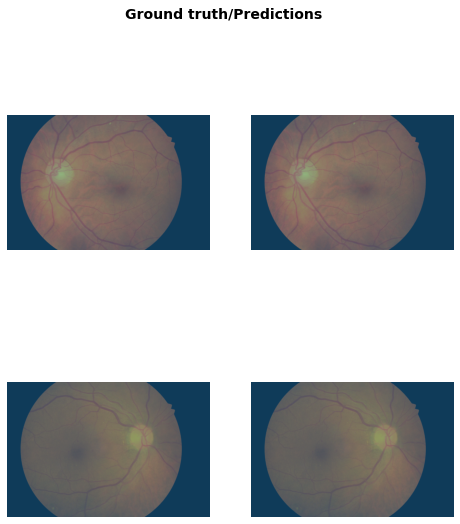

In [37]:
learn.show_results(rows=2, figsize=(8,9))